In [3]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Concordia_game = pd.read_csv("Concordia.csv")

In [5]:
Concordia_game

,Session Title,Player Name,Minutes Played,Split Name,Tags,Distance (miles),Sprint Distance (yards),Power Plays,Energy (kcal),Impacts,...,Accelerations Zone Count: 0 - 1 m/s/s,Accelerations Zone Count: 1 - 2 m/s/s,Accelerations Zone Count: 2 - 3 m/s/s,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s
0,Concordia (Wis.),E,0.0,game,game,1.5320,54.6597,6.0,303.7551,1.0,...,0.0,103.0,42.0,12.0,2.0,0.0,87.0,43.0,11.0,5.0
1,Concordia (Wis.),S,84.0,game,game,5.6169,367.2867,43.0,1033.6839,2.0,...,0.0,268.0,123.0,26.0,5.0,0.0,218.0,118.0,52.0,23.0
2,Concordia (Wis.),U,34.0,game,game,1.9107,248.8936,21.0,342.6379,2.0,...,0.0,58.0,54.0,18.0,0.0,0.0,59.0,39.0,15.0,12.0
3,Concordia (Wis.),J,18.0,game,game,1.3506,89.3807,7.0,262.4318,0.0,...,0.0,51.0,28.0,11.0,3.0,0.0,44.0,25.0,14.0,5.0
4,Concordia (Wis.),H,70.0,game,game,3.3020,110.2260,27.0,536.1326,0.0,...,0.0,149.0,88.0,20.0,1.0,0.0,137.0,60.0,35.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Concordia_full = Concordia_game[Concordia_game['Split Name']== 'game']
Concordia_full

,Session Title,Player Name,Minutes Played,Split Name,Tags,Distance (miles),Sprint Distance (yards),Power Plays,Energy (kcal),Impacts,...,Accelerations Zone Count: 0 - 1 m/s/s,Accelerations Zone Count: 1 - 2 m/s/s,Accelerations Zone Count: 2 - 3 m/s/s,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s
0,Concordia (Wis.),E,0.0,game,game,1.5320,54.6597,6.0,303.7551,1.0,...,0.0,103.0,42.0,12.0,2.0,0.0,87.0,43.0,11.0,5.0
1,Concordia (Wis.),S,84.0,game,game,5.6169,367.2867,43.0,1033.6839,2.0,...,0.0,268.0,123.0,26.0,5.0,0.0,218.0,118.0,52.0,23.0
2,Concordia (Wis.),U,34.0,game,game,1.9107,248.8936,21.0,342.6379,2.0,...,0.0,58.0,54.0,18.0,0.0,0.0,59.0,39.0,15.0,12.0
3,Concordia (Wis.),J,18.0,game,game,1.3506,89.3807,7.0,262.4318,0.0,...,0.0,51.0,28.0,11.0,3.0,0.0,44.0,25.0,14.0,5.0
4,Concordia (Wis.),H,70.0,game,game,3.3020,110.2260,27.0,536.1326,0.0,...,0.0,149.0,88.0,20.0,1.0,0.0,137.0,60.0,35.0,12.0
5,Concordia (Wis.),Q,25.0,game,game,3.3892,146.2867,22.0,718.5011,4.0,...,0.0,162.0,86.0,16.0,2.0,0.0,146.0,74.0,29.0,14.0
6,Concordia (Wis.),C,90.0,game,game,6.6103,312.3886,45.0,1169.6233,1.0,...,0.0,336.0,178.0,46.0,9.0,0.0,325.0,143.0,52.0,23.0
7,Concordia (Wis.),R,39.0,game,game,2.9100,257.6917,23.0,495.9999,0.0,...,0.0,138.0,64.0,11.0,4.0,0.0,118.0,57.0,23.0,13.0
8,Concordia (Wis.),K,90.0,game,game,5.3941,224.2130,42.0,986.9681,0.0,...,0.0,237.0,146.0,41.0,12.0,0.0,243.0,122.0,46.0,24.0
9,Concordia (Wis.),A,3.0,game,game,0.3938,38.7302,3.0,68.3167,0.0,...,0.0,11.0,7.0,4.0,2.0,0.0,12.0,8.0,4.0,0.0


In [7]:
Conc_volume_intensity = Concordia_full[["Player Name", "Minutes Played", "Distance (miles)", "Sprint Distance (yards)", "Power Plays", "Energy (kcal)", "Impacts", "Top Speed (mph)","Distance Per Min (yd/min)", "Power Score (w/kg)", "Player Load", "Work Ratio"]]

In [8]:
Conc_volume_intensity

,Player Name,Minutes Played,Distance (miles),Sprint Distance (yards),Power Plays,Energy (kcal),Impacts,Top Speed (mph),Distance Per Min (yd/min),Power Score (w/kg),Player Load,Work Ratio
0,E,0.0,1.5320,54.6597,6.0,303.7551,1.0,12.8153,28.8120,2.0391,131.0709,12.1240
1,S,84.0,5.6169,367.2867,43.0,1033.6839,2.0,16.8617,105.6365,7.4419,392.2698,44.3297
2,U,34.0,1.9107,248.8936,21.0,342.6379,2.0,16.6181,35.9341,2.5789,146.8447,13.5451
3,J,18.0,1.3506,89.3807,7.0,262.4318,0.0,14.8932,25.4009,1.7858,128.3955,10.3647
4,H,70.0,3.3020,110.2260,27.0,536.1326,0.0,14.4010,62.0999,4.3660,276.1589,25.0601
5,Q,25.0,3.3892,146.2867,22.0,718.5011,4.0,14.3265,63.7391,4.4614,256.1762,25.1273
6,C,90.0,6.6103,312.3886,45.0,1169.6233,1.0,15.4797,124.3191,8.8030,524.9920,56.3718
7,R,39.0,2.9100,257.6917,23.0,495.9999,0.0,16.7623,54.8539,3.8585,198.8972,22.4400
8,K,90.0,5.3941,224.2130,42.0,986.9681,0.0,14.7987,101.4457,7.2101,377.1463,38.5383
9,A,3.0,0.3938,38.7302,3.0,68.3167,0.0,13.1633,7.4065,0.4990,93.2557,1.6402


In [10]:
Conc_cluster = Conc_volume_intensity.loc[:, Conc_volume_intensity.columns != 'Player Name']

In [11]:
Conc_distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Conc_cluster)
    Conc_distortions.append(kmeanModel.inertia_)

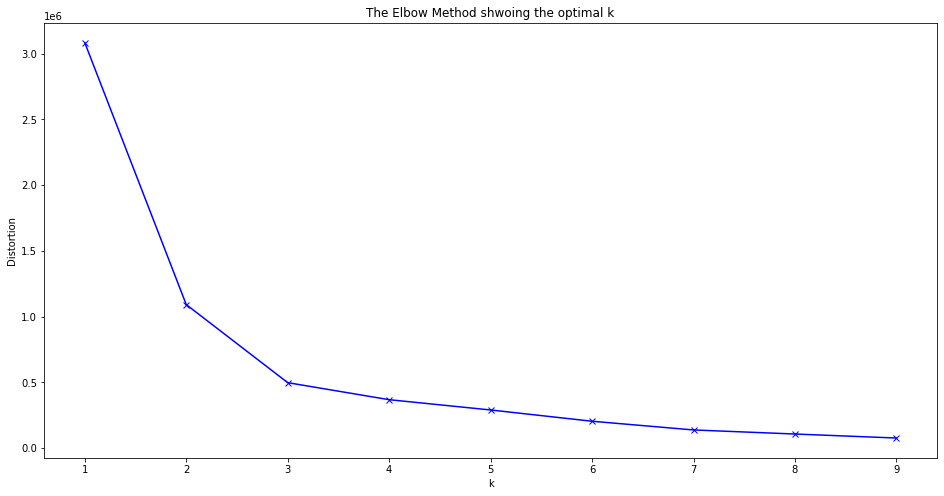

In [12]:
plt.figure(figsize=(16,8))
plt.plot(K, Conc_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method shwoing the optimal k')
plt.show()

In [13]:
x_Conc = Conc_cluster.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x_Conc)
X_norm = pd.DataFrame(x_scaled)

In [15]:
pca_Conc = PCA(n_components = 2) # 2D PCA for the plot
reduced_Conc = pd.DataFrame(pca_Conc.fit_transform(X_norm))

In [16]:
# specify the number of clusters
kmeans = KMeans(n_clusters=3)
# fit the input data
kmeans = kmeans.fit(reduced_Conc)
# get the cluster labels
labels = kmeans.predict(reduced_Conc)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()
# adding names
Conc_names = Concordia_full['Player Name']

In [17]:
reduced_Conc['cluster'] = clusters
reduced_Conc['names'] = Conc_names
reduced_Conc.columns = ['x', 'y', 'cluster', 'names']
reduced_Conc.head()

,x,y,cluster,names
0,-0.858034,0.157678,0,E
1,1.218208,0.148068,1,S
2,-0.325990,0.470244,2,U
3,-0.813623,-0.019183,0,J
4,0.120614,-0.310293,2,H


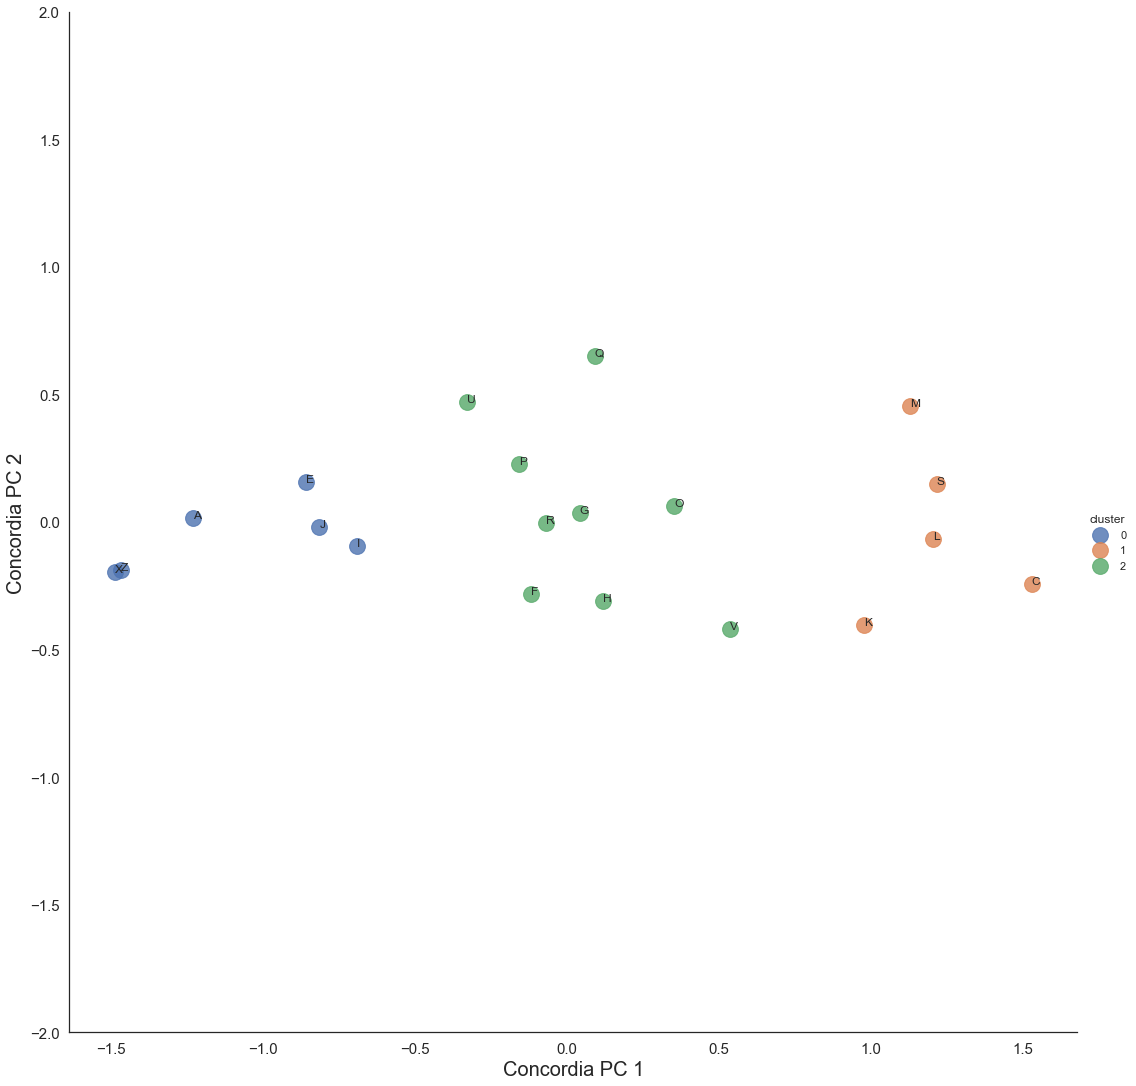

In [19]:
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_Conc, legend= True,
fit_reg=False, height = 15, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced_Conc.x, reduced_Conc.y, reduced_Conc.names):
    texts.append(plt.text(x, y, s))
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("Concordia PC 1", fontsize = 20)
plt.ylabel("Concordia PC 2", fontsize = 20)
plt.show()

In [20]:
Conc_group_0 = reduced_Conc[(reduced_Conc['cluster'] == 0)]
Conc_group_0
# Positions: E(MF) J(F) A(D) I(F) Z(F) X(GK)

,x,y,cluster,names
0,-0.858034,0.157678,0,E
3,-0.813623,-0.019183,0,J
9,-1.229567,0.016827,0,A
13,-0.689294,-0.094755,0,I
15,-1.467341,-0.186238,0,Z
16,-1.485123,-0.195142,0,X


In [21]:
Conc_group_1 = reduced_Conc[(reduced_Conc['cluster'] == 1)]
Conc_group_1
# Positions: S(MF) C(Mf) K(D) L(D) M(D)

,x,y,cluster,names
1,1.218208,0.148068,1,S
6,1.529838,-0.241781,1,C
8,0.979643,-0.405159,1,K
14,1.206309,-0.067318,1,L
17,1.131398,0.454318,1,M


In [22]:
Conc_group_2 = reduced_Conc[(reduced_Conc['cluster'] == 2)]
Conc_group_2
# Positions: U(MF) H(F) Q(MF) R(D) V(MF) G(F) P(F) O(F) F(GK)

,x,y,cluster,names
2,-0.325990,0.470244,2,U
4,0.120614,-0.310293,2,H
5,0.092072,0.651661,2,Q
7,-0.068615,-0.003516,2,R
10,0.536835,-0.419347,2,V
11,0.043711,0.036043,2,G
12,-0.156656,0.228441,2,P
18,0.354019,0.061989,2,O
19,-0.118404,-0.282535,2,F
